In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

### SEC

In [2]:
df = pd.read_csv('SEC.csv',delimiter='\t',encoding = "UTF-16", header=2)
print(df.columns)

Index(['ml', 'mAU', 'ml.1', 'mS/cm', 'ml.2', '%B', 'ml.3', 'Injection', 'ml.4',
       'Fraction', 'ml.5', 'mAU.1'],
      dtype='object')


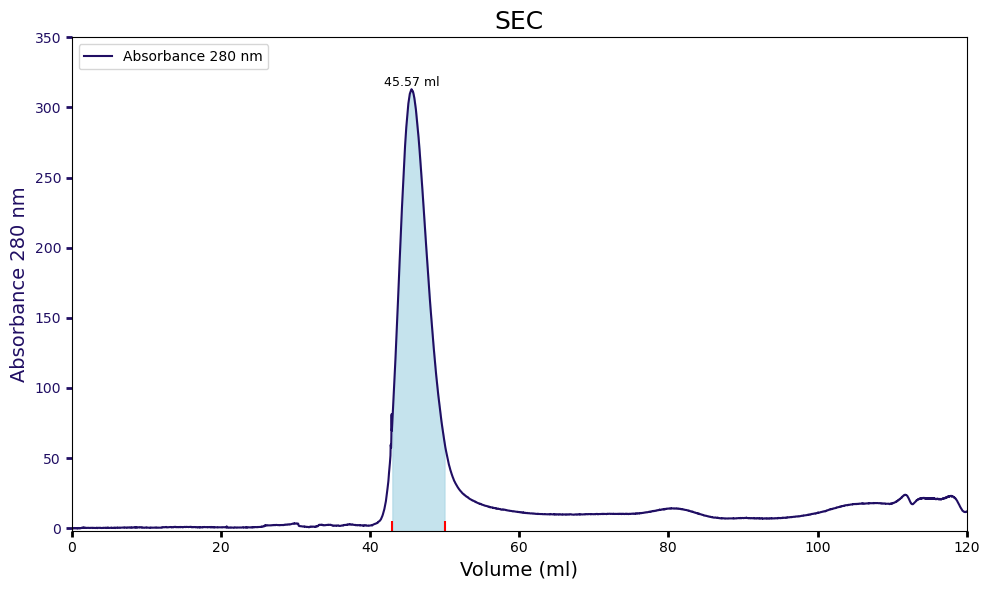

In [16]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.88, top=0.95)
fig.set_size_inches(10,6)

p1, = ax.plot(df['ml'], df['mAU'], "#200e63", label="Absorbance 280 nm")

ax.set_xlabel("Volume (ml)", fontsize=14)
ax.set_ylabel("Absorbance 280 nm", fontsize=14)
ax.set_xlim(0, 120) # Comment this line to auto-scale x-axis, then adjust as needed
ax.set_ylim(-2, 350) # Comment this line to auto-scale y-axis, then adjust as needed
ax.yaxis.label.set_color(p1.get_color())

tkw = dict(size=4, width=2)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)
ax.legend(handles=[p1], loc="upper left")

### Delimit region of fractions collected
regions = [(43, 50)]
for start, end in regions:
    ax.vlines([start, end], -10, 5, colors='red')

# Fill areas under the curve for specified regions
for start, end in regions:
    mask = (df['ml'] >= start) & (df['ml'] <= end)
    ax.fill_between(df['ml'], df['mAU'], where=mask, color='lightblue', y2= -50, alpha=0.7)

# Find peaks in df['mAU']
peaks, _ = signal.find_peaks(df['mAU'], prominence=100)  # Adjust prominence as needed

# Annotate each peak
for peak in peaks:
    x = df['ml'].iloc[peak]
    y = df['mAU'].iloc[peak]
    if x > 120 or x < 0:  # Ensure x is within the x-axis limits
        continue
    ax.text(x, y + 0.1, f"{x:.2f} ml", fontsize=9, ha='center', va='bottom', color='black')

plt.title('SEC', fontsize = 18)
plt.tight_layout()

#plt.savefig('SEC.svg')

### Molecular weight calculation based on column calibration

In [ ]:
# Molecular weight calibration function based on Kav values
def mw_calibration(ve):
    '''Calculate molecular weight from elution volume (ve) using calibration curve.
    ve: Elution volume in ml
    Returns molecular weight in kDa.
    Calibration equation derived from:
    Kav = (Ve - Vo) / (Vt - Vo)
    log(MW) = -0.359 * Kav + 1.11 (parameters from calibration curve)
    '''
    return 10**((((ve-45.14)/(120-45.14))-1.11)/(-0.359))

print(f'Molecular weight: {mw_calibration(45.57):.2f} kDa') 

Molecular weight: 1191.03 kDa
